In [3]:
import numpy as np 
import pandas as pd 
import seaborn as sns 

In [4]:
data = pd.read_csv('oferta_academica.csv', encoding='utf-8')
print(type(data))

<class 'pandas.core.frame.DataFrame'>


In [5]:
pd.options.display.max_rows = 8

In [6]:
# para ver la cantidad de filas y columnas
data.shape


(5859, 7)

In [7]:
# verificando las columnas
data.columns

Index(['IEU', 'LOCALIDAD', 'SIGLAS', 'ESTADO_IEU', 'CARRERA', 'ESTADO_CARRERA',
       'TITULO'],
      dtype='object')

In [8]:
# cambiando el nombre de una columna y guardando los datos
data.rename(columns={'ESTADO_IEU':'ESTATUS'}, inplace=True)

In [9]:
# confirmar el cambio
data

,IEU,LOCALIDAD,SIGLAS,ESTATUS,CARRERA,ESTADO_CARRERA,TITULO
0,Academia Militar de Venezuela,Caracas,AMV,0,Ciencias y Artes Militares Opción Terrestre,0.0,Licenciado en Ciencias y Artes Militares Opció...
1,Colegio Universitario de Administración y Merc...,Ampliación Guacara,CUAM,1,Informática (Técnica),1.0,Técnico Superior en Informática
2,Colegio Universitario de Administración y Merc...,Ampliación Guacara,CUAM,1,Preescolar (Técnica),1.0,Técnico Superior en Preescolar
3,Colegio Universitario de Administración y Merc...,Ampliación Guacara,CUAM,1,Administración de Recursos Humanos (Técnica),1.0,Técnico Superior en Administración de Personal...
...,...,...,...,...,...,...,...
5855,Universidad Valle del Momboy,Valera,UVM,1,Ciencias Políticas,1.0,Licenciado en Ciencias Políticas
5856,Universidad Valle del Momboy,Valera,UVM,1,Derecho,1.0,Abogado
5857,Universidad Valle del Momboy,Valera,UVM,1,Ingeniería Industrial,1.0,Ingeniero Industrial
5858,Universidad Valle del Momboy,Valera,UVM,1,Contaduría Pública,1.0,Licenciado en Contaduría Pública


In [10]:
# ver el numero de filas duplicadas
data.duplicated().sum()

258

In [11]:
# Verificando las filas faltantes
data.isnull().sum()

IEU                 0
LOCALIDAD           0
SIGLAS              1
ESTATUS             0
CARRERA             0
ESTADO_CARRERA      1
TITULO            995
dtype: int64

In [12]:
# mean_value = data['SIGLAS'].mean()
# mean_value si fuese un valor numerico

In [13]:
data['SIGLAS'].fillna('sin siglas', inplace=True)

In [14]:
# para confirmar los cambios
data.isnull().sum()

IEU                 0
LOCALIDAD           0
SIGLAS              0
ESTATUS             0
CARRERA             0
ESTADO_CARRERA      1
TITULO            995
dtype: int64

In [15]:
data['ESTADO_CARRERA'].fillna(0, inplace=True)

In [16]:
data['ESTADO_CARRERA'].unique()

array([0., 1.])

In [17]:
# cambiando el tipo de dato float a string
data['ESTADO_CARRERA'] = data['ESTADO_CARRERA'].astype(str)

In [18]:
data['ESTATUS'] = data['ESTATUS'].astype(str)

In [19]:
data.isnull().sum()

IEU                 0
LOCALIDAD           0
SIGLAS              0
ESTATUS             0
CARRERA             0
ESTADO_CARRERA      0
TITULO            995
dtype: int64

In [20]:
# Dimensiones de la data
data.ndim

2

In [21]:
# Visualizar los 5 primeros y ultimos, si coloco un indice, los limita
data.head
data.tail(4)

,IEU,LOCALIDAD,SIGLAS,ESTATUS,CARRERA,ESTADO_CARRERA,TITULO
5855,Universidad Valle del Momboy,Valera,UVM,1,Ciencias Políticas,1.0,Licenciado en Ciencias Políticas
5856,Universidad Valle del Momboy,Valera,UVM,1,Derecho,1.0,Abogado
5857,Universidad Valle del Momboy,Valera,UVM,1,Ingeniería Industrial,1.0,Ingeniero Industrial
5858,Universidad Valle del Momboy,Valera,UVM,1,Contaduría Pública,1.0,Licenciado en Contaduría Pública


In [22]:
# ver el tipo de dato de cada columna
data.dtypes

IEU               object
LOCALIDAD         object
SIGLAS            object
ESTATUS           object
CARRERA           object
ESTADO_CARRERA    object
TITULO            object
dtype: object

In [23]:
data['ESTADO_CARRERA'].unique()

array(['0.0', '1.0'], dtype=object)

In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5859 entries, 0 to 5858
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   IEU             5859 non-null   object
 1   LOCALIDAD       5859 non-null   object
 2   SIGLAS          5859 non-null   object
 3   ESTATUS         5859 non-null   object
 4   CARRERA         5859 non-null   object
 5   ESTADO_CARRERA  5859 non-null   object
 6   TITULO          4864 non-null   object
dtypes: object(7)
memory usage: 320.5+ KB


In [25]:
data['ESTATUS'].replace('1', 'Activa', inplace=True)

In [26]:
data['ESTATUS'].replace('0', 'Inactiva', inplace=True)

In [27]:
data

,IEU,LOCALIDAD,SIGLAS,ESTATUS,CARRERA,ESTADO_CARRERA,TITULO
0,Academia Militar de Venezuela,Caracas,AMV,Inactiva,Ciencias y Artes Militares Opción Terrestre,0.0,Licenciado en Ciencias y Artes Militares Opció...
1,Colegio Universitario de Administración y Merc...,Ampliación Guacara,CUAM,Activa,Informática (Técnica),1.0,Técnico Superior en Informática
2,Colegio Universitario de Administración y Merc...,Ampliación Guacara,CUAM,Activa,Preescolar (Técnica),1.0,Técnico Superior en Preescolar
3,Colegio Universitario de Administración y Merc...,Ampliación Guacara,CUAM,Activa,Administración de Recursos Humanos (Técnica),1.0,Técnico Superior en Administración de Personal...
...,...,...,...,...,...,...,...
5855,Universidad Valle del Momboy,Valera,UVM,Activa,Ciencias Políticas,1.0,Licenciado en Ciencias Políticas
5856,Universidad Valle del Momboy,Valera,UVM,Activa,Derecho,1.0,Abogado
5857,Universidad Valle del Momboy,Valera,UVM,Activa,Ingeniería Industrial,1.0,Ingeniero Industrial
5858,Universidad Valle del Momboy,Valera,UVM,Activa,Contaduría Pública,1.0,Licenciado en Contaduría Pública


In [28]:
data['ESTADO_CARRERA'].replace('1.0', 'Activa', inplace=True)
data['ESTADO_CARRERA'].replace('0.0', 'Inactiva', inplace=True)

In [29]:
data[['ESTADO_CARRERA','TITULO','ESTATUS']].head(20)

,ESTADO_CARRERA,TITULO,ESTATUS
0,Inactiva,Licenciado en Ciencias y Artes Militares Opció...,Inactiva
1,Activa,Técnico Superior en Informática,Activa
2,Activa,Técnico Superior en Preescolar,Activa
3,Activa,Técnico Superior en Administración de Personal...,Activa
...,...,...,...
16,Activa,Técnico Superior Universitario en Administraci...,Activa
17,Inactiva,Técnico Superior en Turismo,Activa
18,Activa,Técnico Superior en Informática,Activa
19,Activa,Técnico Superior en Preescolar,Activa


In [30]:
data1 = data.dropna()

In [31]:
data1.isnull().sum()

IEU               0
LOCALIDAD         0
SIGLAS            0
ESTATUS           0
CARRERA           0
ESTADO_CARRERA    0
TITULO            0
dtype: int64

In [32]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4864 entries, 0 to 5858
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   IEU             4864 non-null   object
 1   LOCALIDAD       4864 non-null   object
 2   SIGLAS          4864 non-null   object
 3   ESTATUS         4864 non-null   object
 4   CARRERA         4864 non-null   object
 5   ESTADO_CARRERA  4864 non-null   object
 6   TITULO          4864 non-null   object
dtypes: object(7)
memory usage: 304.0+ KB


In [33]:
data1.groupby('CARRERA')['CARRERA'].agg('count')

CARRERA
Actividad Física y Salud      1
Actuación                     1
Acuacultura                   1
Administración               50
                             ..
Técnico Superior Forestal     2
Urbanismo                     2
Ventas                        1
Zootecnia                     1
Name: CARRERA, Length: 706, dtype: int64

In [34]:
data1.groupby('TITULO')['TITULO'].agg('count')

TITULO
Abogado                                   53
Analista de Sistemas                       4
Antropólogo                                1
Arquitecto                                28
                                          ..
Tëcnico Superior en Educación Integral    51
Urbanista                                  2
Zootecnista                                1
licenciado en Teatro Mención Actuación     1
Name: TITULO, Length: 758, dtype: int64

In [ ]:
data1['TITULO'].unique()

In [40]:
data1.groupby('ESTATUS')['ESTATUS'].agg('count')

ESTATUS
Activa      4520
Inactiva     344
Name: ESTATUS, dtype: int64

<Axes: ylabel='TITULO'>

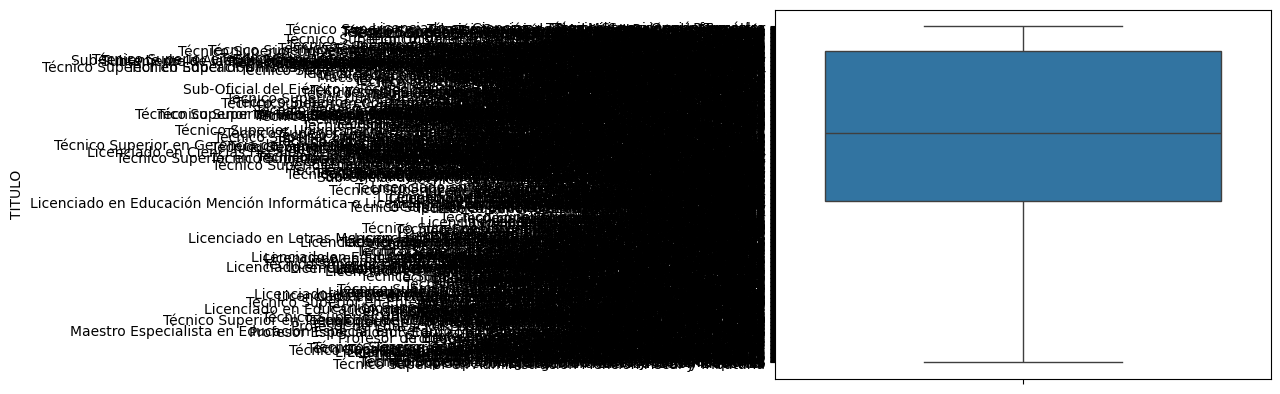

In [43]:
# Checking for outliers in the dataset
# valores fuera del rango
sns.boxplot(data1['TITULO'])